In [10]:
#import nltk

In [11]:
#nltk.download_shell() #download datasets..has a little interactive shell

In [12]:
#MANUAL
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [13]:
type(messages)

list

In [14]:
messages[1]

'ham\tOk lar... Joking wif u oni...'

In [7]:
messages[50]

'ham\tWhat you thinked about me. First time you saw me in class.'

In [8]:
len(messages)

5574

In [9]:
#Collection Of Text is called CORPUS
#Print out the first 10 messages
messages[:10]

['ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
 'ham\tOk lar... Joking wif u oni...',
 "spam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'ham\tU dun say so early hor... U c already then say...',
 "ham\tNah I don't think he goes to usf, he lives around here though",
 "spam\tFreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv",
 'ham\tEven my brother is not like to speak with me. They treat me like aids patent.',
 "ham\tAs per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune",
 'spam\tWINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. 

In [14]:
#Print out the first 10 messages and number them using enumarate
for mess_no, mess_msj in enumerate(messages[:10]):
    print(mess_no,mess_msj)


0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
1 ham	Ok lar... Joking wif u oni...
2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3 ham	U dun say so early hor... U c already then say...
4 ham	Nah I don't think he goes to usf, he lives around here though
5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv
6 ham	Even my brother is not like to speak with me. They treat me like aids patent.
7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 1

In [15]:
messages[0]
#They are \t tab separation

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [18]:
import pandas as pd

In [22]:
messages = pd.read_csv('smsspamcollection/SMSSpamCollection', sep='\t', names=['label','message'])

In [23]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [24]:
#Data Analysis and Visualization

In [26]:
messages.describe()
#count 5572 unique 5269 - deci, avem mesaje care se repeta: Yes, No, I'll call later

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [27]:
#think the features that differentiate ham and spam

In [28]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [31]:
#creaza coloana length care contine lungimea mesajului
messages['length'] = messages['message'].apply(len)

In [32]:
messages.head(2)

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29


In [19]:
#Visualize the length of messages
import matplotlib.pyplot as plt
import seaborn as sns

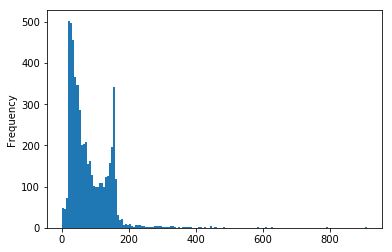

In [35]:
messages['length'].plot.hist(bins=150)

In [37]:
messages['length'].describe()
#maxim e 910 caractere in mesaj

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [38]:
#find the message with 910 caractere

In [39]:
messages[messages['length']>900]

,label,message,length
1085,ham,For me the love should start with attraction.i...,910


In [40]:
messages[messages['length']>900]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C0AD320>,
      dtype=object)

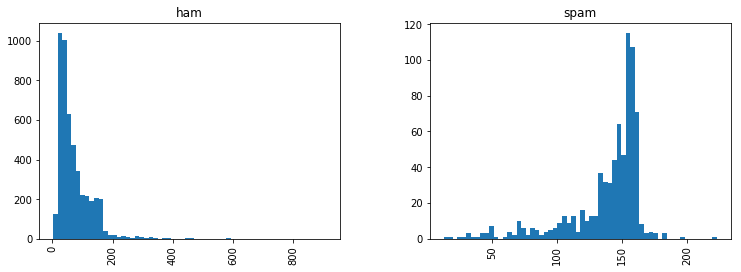

In [42]:
#cu 2 subplots
messages.hist(column='length', by='label', bins=60, figsize=(12,4))

In [43]:
#Se pare ca length face diferenta dintre ham si spam (spam e mai lung)

---Convert messages into vectors (sequence of numbers)---

In [20]:
import string

In [45]:
#remove punctuation
mess = 'Sample message! Notice: it has punctuation.'

In [46]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [47]:
nopunc = [c for c in mess if c not in string.punctuation]

In [49]:
str(nopunc)

"['S', 'a', 'm', 'p', 'l', 'e', ' ', 'm', 'e', 's', 's', 'a', 'g', 'e', ' ', 'N', 'o', 't', 'i', 'c', 'e', ' ', 'i', 't', ' ', 'h', 'a', 's', ' ', 'p', 'u', 'n', 'c', 't', 'u', 'a', 't', 'i', 'o', 'n']"

In [21]:
#Remove stop words. We can read english words from nltk
from nltk.corpus import stopwords

In [56]:
stopwords.words('english') #romanian

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [57]:
nopunc = ''.join(nopunc)

In [58]:
nopunc

'Sample message Notice it has punctuation'

In [66]:
x = ['a','b','c','d']
x

['a', 'b', 'c', 'd']

In [67]:
x = ''.join(x)

In [68]:
x

'abcd'

In [69]:
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [70]:
clean_mess = [word for word in nopunc.split() if word not in stopwords.words('english')]

In [72]:
clean_mess
#The most important words

['Sample', 'message', 'Notice', 'punctuation']

In [73]:
#put all this in a nice function
def text_process(mess):
    ''' 
    1. Remove punctuation
    2. Remove stopwords
    3. Return list of the most important words
    '''
    nopunc = [c for c in mess if c not in string.punctuation] #1.
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [74]:
messages.head(2)

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29


In [2]:
#Now Tokenize messages (:What I just did.. converting a text string into a list of tokens. Tokens are the words
# We actually want)

In [78]:
messages['message'].head(4)

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
Name: message, dtype: object

In [79]:
messages['message'].head(4).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
Name: message, dtype: object

In [3]:
#NOW I MUST CONVERT THIS TOKENS INTO VECTOR IN ORDER FOR SCIKIT LEARN ALGORITHM MODELS CAN UNDERSTAND

In [4]:
#in 3 way steps:
#1) How many time a word occur in message (known as frequency)
#2) Weight the counts so that frequent tokens get lower weight (inverse document frequency)
#3) Normalize the vectors to unit length to abstract from the original text length

In [83]:
#Imagine a 2D Matrix (tabel) cu cate un cuvant per row si sms-urile 1,2,3,..2000000 pe coloane cu valori 1,2,..7
#De cate ori un cuvant apare in mesaj?

In [5]:
#SO I have a VERY LARGE 2D Matrix of all the words(unique) and all the messages

In [6]:
#I can use a Sparse Matrix (un alt format de a stoca THE MATRIX ... pentru memorie)

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

In [87]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

In [88]:
print(len(bow_transformer.vocabulary_))

11425


In [7]:
#looks like there are 11425 cuvinte in vocabular

In [99]:
#EXPLORE 1 MESSAGE
mess4 = messages['message'][3]

In [91]:
print(mess4)

U dun say so early hor... U c already then say...


In [92]:
bow4 = bow_transformer.transform([mess4])

In [93]:
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [94]:
print(bow4.shape)

(1, 11425)


In [95]:
#That means are 7 unique words..after removing stopwords.. 2 cuvinte apar de 2 ori

In [15]:
#Confirm wich one appear twice
#bow_transformer.get_feature_names()[4068]

In [98]:
bow_transformer.get_feature_names()[9554]

'say'

In [112]:
#TOATE
message_bow = bow_transformer.transform(messages['message'])

In [101]:
print('Shape of sparse Matrix', message_bow.shape)

Shape of sparse Matrix (5572, 11425)


In [102]:
#5572 rows
#11425 columns

In [103]:
#Check the amount of non-zero currences
message_bow.nnz

50548

In [104]:
#50548 are non-zero

In [23]:
from sklearn.feature_extraction.text import TfidfTransformer

In [108]:
tfid_transformer = TfidfTransformer().fit(message_bow)

In [109]:
#see for single message
tfid4 = tfid_transformer.transform(bow4)

In [111]:
print(tfid4) 
#inverse document frequency
#the weight   value for each word VS the actual document.

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [114]:
#grab invert document frequency for 1 word.. the weight of 1 word
tfid_transformer.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

In [115]:
#Now convert all
messages_tfid = tfid_transformer.transform(message_bow)

In [132]:
print(messages_tfid.shape[0])
print(messages_tfid.shape[1])
#row
#columns

5572
11425


In [133]:
#Now I can use any of machine learning classifiers

In [24]:
from sklearn.naive_bayes import MultinomialNB

In [135]:
spam_detect_model = MultinomialNB()

In [136]:
spam_detect_model.fit(messages_tfid,messages['label'])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [137]:
spam_detect_model.predict(tfid4)

array(['ham'], dtype='<U4')

In [139]:
#check
messages['label'][3]

'ham'

In [142]:
#Prezi Pentru toate
all_pred = spam_detect_model.predict(messages_tfid)

In [143]:
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [25]:
#Split the data in training set and test
#Use the true power of the model
from sklearn.model_selection import train_test_split

In [147]:
msg_train,msg_test,label_train,label_test = train_test_split(messages['message'],messages['label'],test_size=0.3)

In [154]:
msg_train

3326                         Nope... Juz off from work...
1290    Hey...Great deal...Farm tour 9am to 5pm $95/pa...
574                                Waiting for your call.
254     Ups which is 3days also, and the shipping comp...
5006    Guess which pub im in? Im as happy as a pig in...
1685                       Do you want bold 2 or bb torch
1121             Cancel cheyyamo?and get some money back?
2226    Alrite jod hows the revision goin? Keris bin d...
936                            Then dun wear jeans lor...
4581    Hi ....My engagement has been fixd on  &lt;#&g...
3763    FREE for 1st week! No1 Nokia tone 4 ur mob eve...
1306    Designation is software developer and may be s...
3674    Moji just informed me that you saved our lives...
1197    What he said is not the matter. My mind saying...
4204    C movie is juz last minute decision mah. Juz w...
2318    Waqt se pehle or naseeb se zyada kisi ko kuch ...
1151          (That said can you text him one more time?)
493           

In [155]:
#Use pipeline from sklearn is better and easiest

In [26]:
from sklearn.pipeline import Pipeline

In [158]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)), #text_process e metoda care face tokeni
    ('tfid', TfidfTransformer()),
    ('classifier',MultinomialNB())
])

In [161]:
pipeline.fit(msg_train,label_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x000000000C300A60>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocesso...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [171]:
predictions = pipeline.predict(msg_test)

In [217]:
#Singular TEST
#SPAM
pred = pipeline.predict(['Free Entry In Here'])

In [218]:
pred

array(['spam'], dtype='<U4')

In [27]:
from sklearn.metrics import classification_report,confusion_matrix

In [164]:
print(classification_report(label_test, predictions))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1466
        spam       1.00      0.68      0.81       206

   micro avg       0.96      0.96      0.96      1672
   macro avg       0.98      0.84      0.90      1672
weighted avg       0.96      0.96      0.96      1672



In [166]:
type(msg_test)

pandas.core.series.Series

=====================================PROJECT============================================

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [29]:
yelp = pd.read_csv('yelp.csv')

In [30]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [31]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [32]:
yelp['text leght'] = yelp['text'].apply(len)

In [33]:
yelp.head(2)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text leght
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345


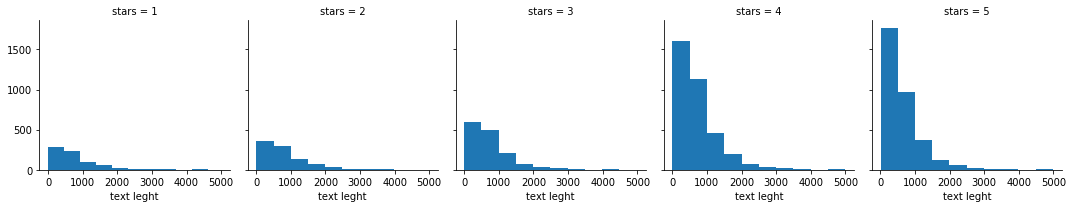

In [34]:
g = sns.FacetGrid(yelp,col='stars')
g.map(plt.hist,'text leght')

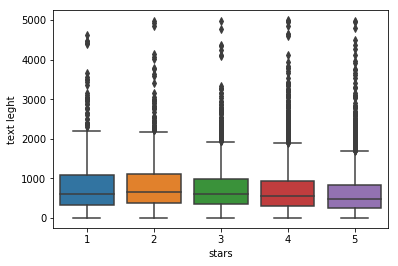

In [35]:
sns.boxplot(x='stars',y='text leght', data=yelp)

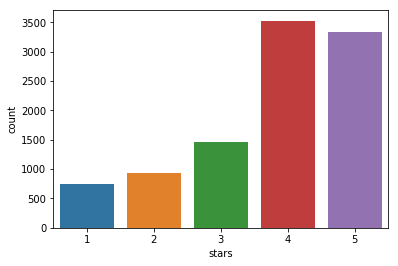

In [36]:
sns.countplot(x='stars',data=yelp)

In [37]:
stars = yelp.groupby('stars').mean()
stars

,cool,useful,funny,text leght
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


In [38]:
stars.corr()

,cool,useful,funny,text leght
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text leght,-0.857664,0.699881,0.843461,1.000000


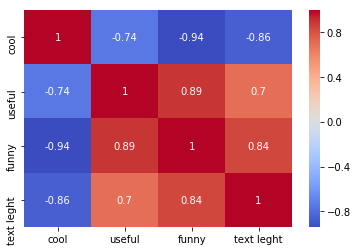

In [39]:
sns.heatmap(stars.corr(),cmap='coolwarm',annot=True)

In [40]:
#Create dataframe for 1 or 5 stars
yelp_class = yelp[(yelp['stars']==1) | (yelp['stars']==5)]

In [41]:
yelp_class.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4086 entries, 0 to 9999
Data columns (total 11 columns):
business_id    4086 non-null object
date           4086 non-null object
review_id      4086 non-null object
stars          4086 non-null int64
text           4086 non-null object
type           4086 non-null object
user_id        4086 non-null object
cool           4086 non-null int64
useful         4086 non-null int64
funny          4086 non-null int64
text leght     4086 non-null int64
dtypes: int64(5), object(6)
memory usage: 383.1+ KB


In [42]:
X=yelp_class['text']
y=yelp_class['stars']

In [43]:
from sklearn.feature_extraction.text import CountVectorizer

In [44]:
cv = CountVectorizer()

In [45]:
X = cv.fit_transform(X)

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [48]:
from sklearn.naive_bayes import MultinomialNB

In [49]:
nb = MultinomialNB()

In [50]:
nb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [51]:
predictions = nb.predict(X_test)

In [52]:
from sklearn.metrics import classification_report,confusion_matrix

In [53]:
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           1       0.88      0.70      0.78       228
           5       0.93      0.98      0.96       998

   micro avg       0.93      0.93      0.93      1226
   macro avg       0.91      0.84      0.87      1226
weighted avg       0.92      0.93      0.92      1226

[[159  69]
 [ 22 976]]


In [256]:
#GOOD... Now let include TF-IDF using pipeline and see the results

In [54]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

In [55]:
#Create a pipeline with the following steps 
pipe = Pipeline([
    ('bow', CountVectorizer()), #text_process e metoda care face tokeni
    ('tfid', TfidfTransformer()),
    ('model',MultinomialNB())
])

In [56]:
X=yelp_class['text']
y=yelp_class['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [57]:
pipe.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_...ear_tf=False, use_idf=True)), ('model', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [58]:
#prezice cate stele are... 1 sau 5
predictions = pipe.predict(X_test)

In [59]:
predictions

array([5, 5, 5, ..., 5, 5, 5], dtype=int64)

In [60]:
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       228
           5       0.81      1.00      0.90       998

   micro avg       0.81      0.81      0.81      1226
   macro avg       0.41      0.50      0.45      1226
weighted avg       0.66      0.81      0.73      1226

[[  0 228]
 [  0 998]]


C:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
